# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측

#### feature (22개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

### 🌟 1Cycle

#### 📊 전처리

In [3]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)

In [4]:
# 언더 샘플링
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

---

### 🌟 2Cycle

In [5]:
# 수치형 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

std_pre_h_df = pre_h_df.copy()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

for column in columns:
    # 표준화 객체 생성
    std = StandardScaler()
    # 데이터 표준화 변환
    result = std.fit_transform(pre_h_df[[column]])
    # 표준화 데이터 프레임 생성
    std_pre_h_df[column] = result

for column in columns:
    # 타겟 데이터 이상치 제거
    std_pre_h_df = std_pre_h_df[std_pre_h_df[column].between(-1.96, 1.96)]

# 이상치 제거 후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_h_df = pre_h_df.iloc[std_pre_h_df.index].reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

#### 🚩 2Cycle 결과
- 전처리 후 Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 💡 분석
- 이상치 제거 후 성능이 향상된 것을 확인함.
- 최소-최대 스케일링(min-max scaling)을 통해 값을 정규화하여 성능 차이를 비교하기로 함.

---

### 🌟 3Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 3Cycle 결과
- Min-Max Scaling  
**정확도: 0.7722, 정밀도: 0.7569, 재현율: 0.7466, F1:0.7517, AUC:0.7703**

#### 💡 분석
- Min-Max Scaling 시 이전 보다 성능이 저하됨에 따라 해당 전처리를 진행하지 않기로 함.
- 피처 이상치 제거 후 성능 평가를 진행하기로 함.

---

### 🌟 4Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 4Cycle 결과
- 피처 이상치 제거  
**정확도: 0.7716, 정밀도: 0.7474, 재현율: 0.7100, F1:0.7282, AUC:0.7641**

#### 💡 분석
- 피처 이상치 제거 시 이전 보다 성능이 저하됨에 따라 해당 전처리를 진행하지 않기로 함.
- 0과 같은 특정 데이터가 높게 나타나는 SkinThickness, lnsulin의 일부 데이터의 전처리를 진행하고자 함.

---

### 🌟 5Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 4Cycle 결과
- 피처 이상치 제거  
**정확도: 0.7716, 정밀도: 0.7474, 재현율: 0.7100, F1:0.7282, AUC:0.7641**

#### 🚩 5Cycle 결과
- 특정 피처 이상치 제거  
**정확도: 0.7917, 정밀도: 0.8000, 재현율: 0.6087, F1:0.6914, AUC:0.7571**

#### 💡 분석
- 특정 피처 이상치 제거 시 오히려 성능이 저하되는 것을 확인함.
- 해당 전처리는 진행하지 않는 것으로 하며, 분포 변환을 별도로 진행하기로 함.

---

### 🌟 6Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 6Cycle 결과
- 분포 변환 
**정확도: 0.7880, 정밀도: 0.7801, 재현율: 0.7534, F1:0.7666, AUC:0.7855**

#### 💡 분석
- 분포 변환 후 성능이 근소하게 하락함에 따라 해당 전처리를 진행하지 않는 것으로 함.
- 차원축소를 진행하여 성능으

---

### 🌟 7~8Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 7Cycle 결과
- PCA
**정확도: 0.7405, 정밀도: 0.7462, 재현율: 0.6644, F1:0.7029, AUC:0.7351**

#### 🚩 8Cycle 결과
- LDA
**정확도: 0.2184, 정밀도: 0.1656, 재현율: 0.1712, F1:0.1684, AUC:0.2150**

#### 💡 분석
- 차원축소 진행 후 성능이 많이 하락한 것을 확인할 수 있음.
- 상관관계, 다중 공산성 등을 확인하여 전처리 진행 후 성능 평가를 진행하고자 함.

---

### 🌟 9Cycle

In [6]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [7]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              295.9
Date:                Mon, 13 May 2024   Prob (F-statistic):                   5.88e-307
Time:                        15:43:45   Log-Likelihood:                         -908.08
No. Observations:                1579   AIC:                                      1832.
Df Residuals:                    1571   BIC:                                      1875.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [9]:
# 다중 공산성 확인
get_vif(features)

,vif_score,features
0,3.298600,Pregnancies
1,23.676345,Glucose
2,37.887663,BloodPressure
3,4.412035,SkinThickness
4,2.372232,Insulin
5,32.986982,BMI
6,4.202315,DiabetesPedigreeFunction
7,15.639765,Age


In [10]:
# 상관관계 확인
pre_h_df.corr()['Outcome'].sort_values(ascending=False)[1:]

Glucose                     0.502442
Age                         0.298462
BMI                         0.291449
Pregnancies                 0.266905
BloodPressure               0.190834
DiabetesPedigreeFunction    0.167986
Insulin                     0.161790
SkinThickness               0.060222
Name: Outcome, dtype: float64

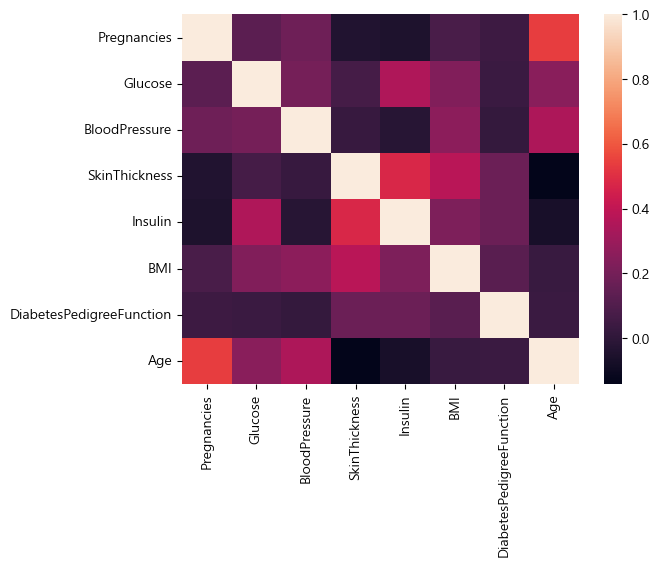

In [11]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

In [12]:
# 상관 관계가 낮은 피처 제거
pre_h_df = pre_h_df.drop(labels=['SkinThickness'], axis=1)

In [13]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              337.7
Date:                Mon, 13 May 2024   Prob (F-statistic):                   7.19e-308
Time:                        15:43:45   Log-Likelihood:                         -908.93
No. Observations:                1579   AIC:                                      1832.
Df Residuals:                    1572   BIC:                                      1869.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [14]:
# 다중 공산성 확인
get_vif(features)

,vif_score,features
0,3.295610,Pregnancies
1,23.144536,Glucose
2,37.850309,BloodPressure
3,1.917147,Insulin
4,28.790821,BMI
5,4.171992,DiabetesPedigreeFunction
6,15.468801,Age


In [15]:
# 상관관계 확인
pre_h_df.corr()['Outcome'].sort_values(ascending=False)[1:]

Glucose                     0.502442
Age                         0.298462
BMI                         0.291449
Pregnancies                 0.266905
BloodPressure               0.190834
DiabetesPedigreeFunction    0.167986
Insulin                     0.161790
Name: Outcome, dtype: float64

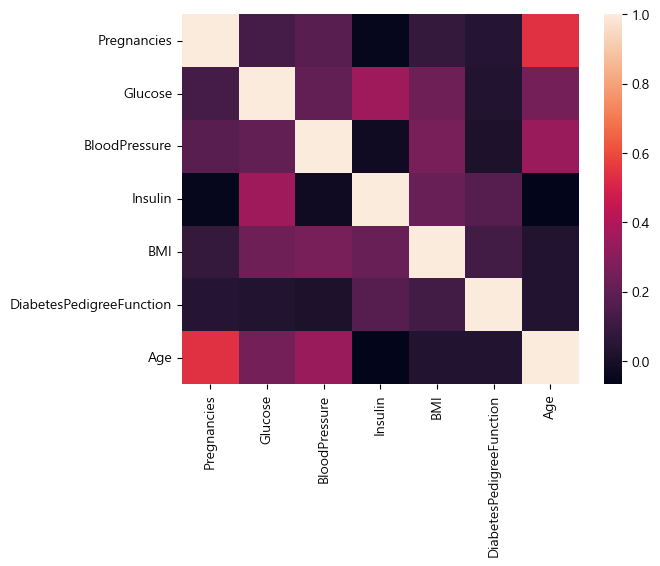

In [16]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[140  30]
 [ 35 111]]
정확도: 0.7943, 정밀도: 0.7872, 재현율: 0.7603, F1:0.7735, AUC:0.7919
###########################################################################


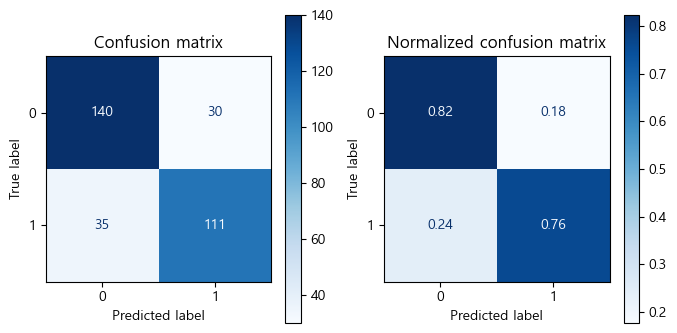

In [18]:
get_evaluation(y_test, prediction, lg, X_test)

In [19]:
data = {
    'model': ['2Cycle', '9Cycle'],
    '정확도': [0.7911, 0.7943],
    '정밀도': [0.7817, 0.7872],
    '재현율': [0.7603, 0.7603],
    'F1': [0.7708, 0.7735],
    'AUC': [0.7890, 0.7919]
}

Cycle9 = pd.DataFrame(data)

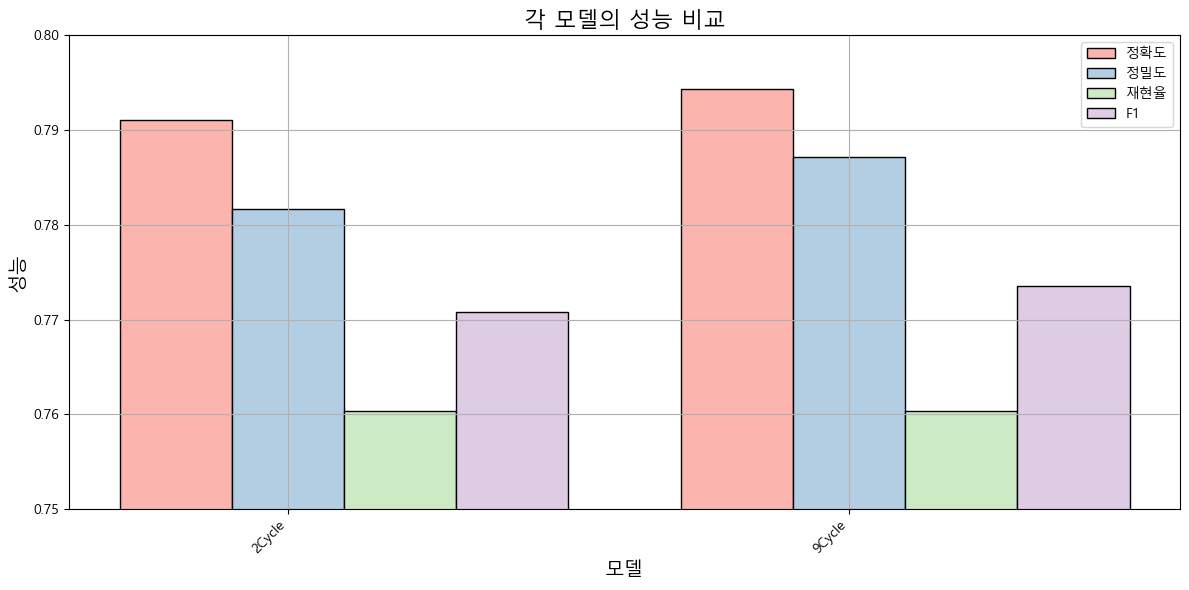

,model,정확도,정밀도,재현율,F1,AUC
0,2Cycle,0.7911,0.7817,0.7603,0.7708,0.7890
1,9Cycle,0.7943,0.7872,0.7603,0.7735,0.7919


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = Cycle9['model']
accuracy = Cycle9['정확도']
precision = Cycle9['정밀도']
recall = Cycle9['재현율']
f1 = Cycle9['F1']
AUC = Cycle9['AUC']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')
# plt.bar(index + 4*bar_width, AUC, color=cmap(np.array([4])), width=bar_width, label='AUC', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.75, 0.8)

plt.tight_layout()
plt.show()

display(Cycle9)

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 9Cycle 결과
- 상관관계
**정확도: 0.7943, 정밀도: 0.7872, 재현율: 0.7603, F1:0.7735, AUC:0.7919**

#### 💡 분석
- 상관관계 등 다양한 지표 확인 후 관계가 낮은 피처를 제거한 결과 성능이 향상된 것을 확인함.
- 전처리된 데이터를 토대로 임계값을 조정하려 함.